In [1]:
import pandas as pd

In [2]:
import os

In [3]:
from tqdm.notebook import tqdm

In [4]:
data_path = '/kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset'

In [5]:
import random

In [6]:
def split_list(data, split_ratio=0.8):
    # Calculate the index to split the list
    split_index = int(len(data) * split_ratio)
    
    # Shuffle the list randomly
    random.shuffle(data)
    
    # Split the list based on the calculated index
    train_data = data[:split_index]
    test_data = data[split_index:]
    
    return train_data, test_data

In [7]:
import os

def delete_files_in_directory(directory_path):
    # Get the list of files in the directory
    files = os.listdir(directory_path)

    # Iterate through the files and delete each one
    for file_name in tqdm(files):
        file_path = os.path.join(directory_path, file_name)
        try:
            if os.path.isfile(file_path):
                os.remove(file_path)
        except Exception as e:
            print(f"Error deleting {file_path}: {e}")
            
    shutil.rmtree(directory_path)

# Example usage:
# directory_to_clear = '/kaggle/working/val'
# delete_files_in_directory(directory_to_clear)
# print('Done')

In [8]:
import shutil

os.mkdir('/kaggle/working/train')
os.mkdir('/kaggle/working/val')

for class_name in os.listdir(data_path):
    if not os.path.isdir(os.path.join(data_path, class_name)):
        continue
    print('Processing: ', class_name)
    images_path = os.path.join(data_path, class_name, 'masks')
    train_files, val_files = split_list(os.listdir(images_path), 0.8)
    train_ds = f'/kaggle/working/train/{class_name}'
    os.mkdir(train_ds)
    for file_name in tqdm(train_files):
        shutil.copy(os.path.join(images_path, file_name), os.path.join(train_ds, file_name))
    val_ds = f'/kaggle/working/val/{class_name}'
    os.mkdir(val_ds)
    for file_name in tqdm(val_files):
        shutil.copy(os.path.join(images_path, file_name), os.path.join(val_ds, file_name))

Processing:  Normal


  0%|          | 0/8153 [00:00<?, ?it/s]

  0%|          | 0/2039 [00:00<?, ?it/s]

Processing:  Lung_Opacity


  0%|          | 0/4809 [00:00<?, ?it/s]

  0%|          | 0/1203 [00:00<?, ?it/s]

Processing:  Viral Pneumonia


  0%|          | 0/1076 [00:00<?, ?it/s]

  0%|          | 0/269 [00:00<?, ?it/s]

Processing:  COVID


  0%|          | 0/2892 [00:00<?, ?it/s]

  0%|          | 0/724 [00:00<?, ?it/s]

In [9]:
import os

# Directory with training horse pictures
train_normal_dir = os.path.join('/kaggle/working/train/Normal')

# Directory with training human pictures
train_covid_dir = os.path.join('/kaggle/working/train/COVID')

# Directory with validation horse pictures
validation_normal_dir = os.path.join('/kaggle/working/val/Normal')

# Directory with validation human pictures
validation_covid_dir = os.path.join('/kaggle/working/val/COVID')

In [10]:
train_normal_names = os.listdir(train_normal_dir)
print(f'TRAIN SET NORMALS: {train_normal_names[:10]}')

train_covid_names = os.listdir(train_covid_dir)
print(f'TRAIN SET COVID: {train_covid_names[:10]}')

validation_normal_names = os.listdir(validation_normal_dir)
print(f'VAL SET NORMALS: {validation_normal_names[:10]}')

validation_covid_names = os.listdir(validation_covid_dir)
print(f'VAL SET COVID: {validation_covid_names[:10]}')

TRAIN SET NORMALS: ['Normal-6077.png', 'Normal-5753.png', 'Normal-2829.png', 'Normal-9904.png', 'Normal-5594.png', 'Normal-7630.png', 'Normal-6058.png', 'Normal-4757.png', 'Normal-1064.png', 'Normal-5995.png']
TRAIN SET COVID: ['COVID-2363.png', 'COVID-986.png', 'COVID-900.png', 'COVID-1994.png', 'COVID-1112.png', 'COVID-2013.png', 'COVID-2089.png', 'COVID-2120.png', 'COVID-2396.png', 'COVID-3447.png']
VAL SET NORMALS: ['Normal-2569.png', 'Normal-8074.png', 'Normal-2833.png', 'Normal-1574.png', 'Normal-8663.png', 'Normal-7444.png', 'Normal-6959.png', 'Normal-7480.png', 'Normal-2984.png', 'Normal-4958.png']
VAL SET COVID: ['COVID-2859.png', 'COVID-3011.png', 'COVID-3345.png', 'COVID-3592.png', 'COVID-3554.png', 'COVID-318.png', 'COVID-3503.png', 'COVID-607.png', 'COVID-87.png', 'COVID-601.png']


In [11]:
print(f'total training NORMAL images: {len(os.listdir(train_normal_dir))}')
print(f'total training COVID images: {len(os.listdir(train_covid_dir))}')
print(f'total validation NORMAL images: {len(os.listdir(validation_normal_dir))}')
print(f'total validation COVID images: {len(os.listdir(validation_covid_dir))}')

total training NORMAL images: 8153
total training COVID images: 2892
total validation NORMAL images: 2039
total validation COVID images: 724


In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

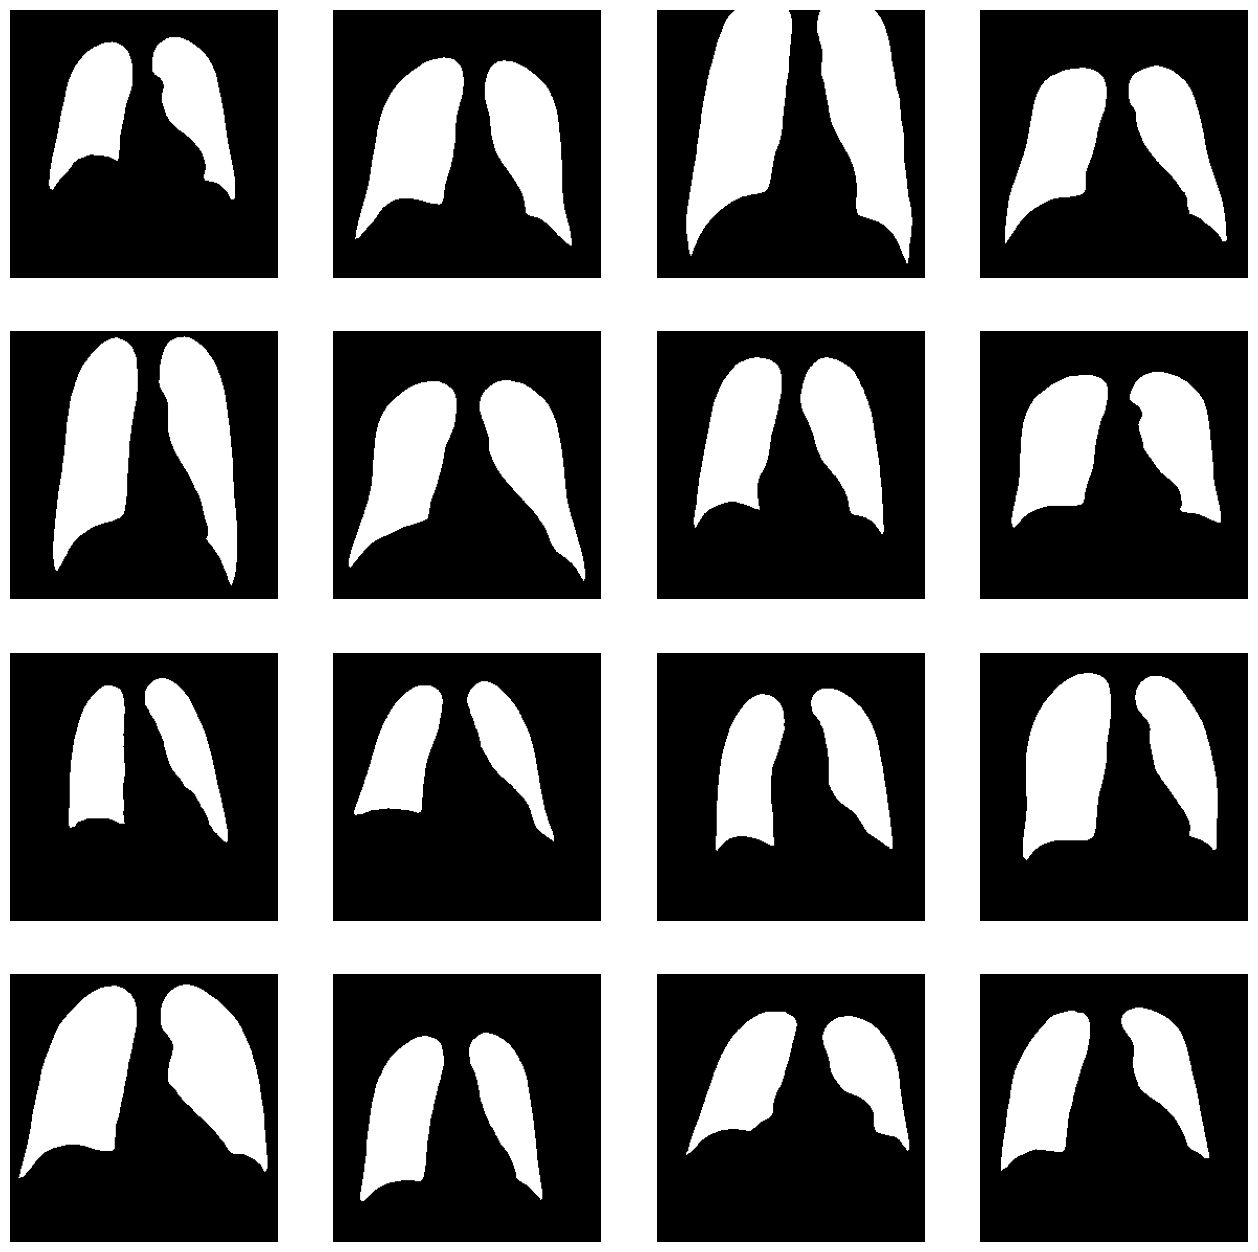

(256, 256, 3)


In [13]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_normal_dir, fname) 
                for fname in train_normal_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_covid_dir, fname) 
                for fname in train_covid_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()
print(img.shape)

In [14]:
import os
import random

def find_minimum_files_count(directory):
    # Get the list of files in the directory
    files = os.listdir(directory)
    
    # Return the count of files in the directory
    return len(files)

def equalize_folders(file_root):
    # Get a list of all subdirectories in the given root directory
    subdirectories = [d for d in os.listdir(file_root) if os.path.isdir(os.path.join(file_root, d))]
    
    if not subdirectories:
        print("No subdirectories found.")
        return
    
    # Find the minimum number of files among all subdirectories
    min_files_count = min(find_minimum_files_count(os.path.join(file_root, subdir)) for subdir in subdirectories)
    
    # Equalize the number of files in each subdirectory
    for subdir in subdirectories:
        subdir_path = os.path.join(file_root, subdir)
        files = os.listdir(subdir_path)
        
        while len(files) > min_files_count:
            # Remove random file
            random_file = os.path.join(subdir_path, random.choice(files))
            os.remove(random_file)
            files.remove(os.path.basename(random_file))
            print(f"Deleted: {random_file}")

# Example usage:
# root_directory = 'path/to/root'
# equalize_folders(root_directory)


In [18]:
for sub in ['train', 'val']:
    sub_folder = f'/kaggle/working/{sub}'
    equalize_folders(sub_folder)

In [16]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(4, activation='sigmoid')
])

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [21]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os

# Load the first example of a happy face
sample_image  = load_img(f"{os.path.join('/kaggle/working/train/Lung_Opacity', os.listdir('/kaggle/working/train/Lung_Opacity')[0])}")

# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

print(f"The maximum pixel value used is: {np.max(sample_array)}")



Each image has shape: (256, 256, 3)
The maximum pixel value used is: 255.0


In [22]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.9:
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


def image_generator(folder):
    train_datagen = ImageDataGenerator(rescale=1./255)

    # Specify the method to load images from a directory and pass in the appropriate arguments:
    # - directory: should be a relative path to the directory containing the data
    # - targe_size: set this equal to the resolution of each image (excluding the color dimension)
    # - batch_size: number of images the generator yields when asked for a next batch. Set this to 10.
    # - class_mode: How the labels are represented. Should be one of "binary", "categorical" or "sparse".
    #               Pick the one that better suits here given that the labels are going to be 1D binary labels.
    train_generator = train_datagen.flow_from_directory(directory=folder,
                                                        target_size=(256, 256),
                                                        batch_size=10,
                                                        class_mode='categorical')

    return train_generator


In [25]:
# Save generator in a variable
gen = image_generator('/kaggle/working/train')
val_gen = image_generator('/kaggle/working/val')

Found 4304 images belonging to 4 classes.
Found 1076 images belonging to 4 classes.


In [28]:
from tensorflow.keras import optimizers, losses, layers

# Instantiate the callback
callbacks = myCallback()

# Define the model
model = tf.keras.models.Sequential([
    # Convolutional Layer 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D(2, 2),
    # Convolutional Layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    # Convolutional Layer 3
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    # Flatten the output for the fully connected layers
    layers.Flatten(),
    # Fully Connected Layer 1
    layers.Dense(128, activation='relu'),
    # Output Layer
    layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=0.001),
              metrics=['accuracy'])


# Train the model
history = model.fit(
    gen,
#     steps_per_epoch=15,
    epochs=15,
    verbose=1,
    validation_data = val_gen,
    callbacks = [callbacks])

Epoch 1/15
431/431 [==============================] - 14s 27ms/step - loss: 0.9653 - accuracy: 0.5581 - val_loss: 0.8261 - val_accuracy: 0.5781
Epoch 2/15
431/431 [==============================] - 12s 27ms/step - loss: 0.7442 - accuracy: 0.6731 - val_loss: 0.7779 - val_accuracy: 0.6636
Epoch 3/15
431/431 [==============================] - 12s 27ms/step - loss: 0.5478 - accuracy: 0.7686 - val_loss: 0.8078 - val_accuracy: 0.6468
Epoch 4/15
431/431 [==============================] - 12s 27ms/step - loss: 0.3274 - accuracy: 0.8766 - val_loss: 1.0634 - val_accuracy: 0.6431
Epoch 5/15
431/431 [==============================] - ETA: 0s - loss: 0.1432 - accuracy: 0.9480
Reached 90% accuracy so cancelling training!
431/431 [==============================] - 12s 27ms/step - loss: 0.1432 - accuracy: 0.9480 - val_loss: 1.3296 - val_accuracy: 0.6301


In [31]:
class_names = gen.class_indices
class_names

{'COVID': 0, 'Lung_Opacity': 1, 'Normal': 2, 'Viral Pneumonia': 3}

1/1 [==============================] - 0s 22ms/step
Predicted class: COVID


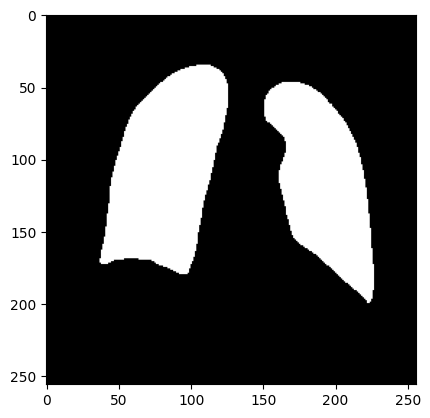

In [32]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

path = '/kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset/COVID/masks/COVID-1.png'
img = load_img(path, target_size=(256, 256))
x = img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
predictions = model.predict(images, batch_size=10)

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Get the predicted class label from the 'gen' variable
predicted_class = list(class_names.keys())[list(class_names.values()).index(predicted_class_index)]

# Print the prediction
print("Predicted class:", predicted_class)
# print("Class probabilities:", predictions)

plt.imshow(img)
plt.show()